<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/Convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 54.6MB/s 
     |████████████████████████████████| 3.8MB 51.6MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import division

In [3]:
# Using Fashion Mnist and Cifar-10 Datasets
(x_train_fm, y_train_fm), (x_test_fm, y_test_fm) = tf.keras.datasets.fashion_mnist.load_data()
(x_train_cifar,y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# Scaling the data
x_train_fm, x_test_fm, x_train_cifar, x_test_cifar = x_train_fm/255.0, x_test_fm/255.0 , x_train_cifar/255.0 , x_test_cifar/255.0 

In [0]:
# Reshaping the data tp N * 28 * 28 *1 for CNN, Flatting Cifar labels 
x_train_fm = tf.reshape(x_train_fm, (-1, x_train_fm.shape[1], x_train_fm.shape[2], 1))
x_test_fm = tf.reshape(x_test_fm, (-1, x_test_fm.shape[1], x_test_fm.shape[2], 1))
y_train_cifar = y_train_cifar.flatten()
y_test_cifar = y_test_cifar.flatten()

In [0]:
# Building the CNN Fashion Mnist Model
i = Input(shape=x_train_fm[0].shape)
x = Conv2D(32 , (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64 , (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128 , (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3) (x)
x = Dense(1028, activation='relu')(x)
x = Dropout(0.2) (x)
x = Dense(len(set(y_train_fm)), activation='softmax')(x)

model_fm = Model(i, x)
model_fm.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the CNN Fashion Mnist Model
r_fm = model_fm.fit(x_train_fm, y_train_fm, validation_data=[x_test_fm, y_test_fm], epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.5203 - accuracy: 0.8073 - val_loss: 0.3894 - val_accuracy: 0.8566
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3641 - accuracy: 0.8644 - val_loss: 0.3620 - val_accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3166 - accuracy: 0.8807 - val_loss: 0.3244 - val_accuracy: 0.8792
Epoch 4/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2842 - accuracy: 0.8923 - val_loss: 0.3097 - val_accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2646 - accuracy: 0.8994 - val_loss: 0.2939 - val_accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2452 - accuracy: 0.9086 - val_loss: 0.2947 - val_accuracy: 0.8949
Epoch 7/10
60000/60000 [=========================

In [8]:
# Accuracy Fashion Mnist
print('Validation Accuracy:',model_fm.evaluate(x_test_fm, y_test_fm))

10000/10000 [==============================] - 1s 72us/sample - loss: 0.2985 - accuracy: 0.8980
Validation Accuracy: [0.2985379800438881, 0.898]


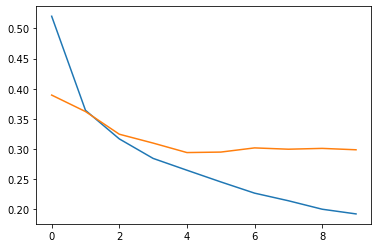

In [9]:
plt.plot(r_fm.history['loss'], Label='Loss')
plt.plot(r_fm.history['val_loss'], Label='Val_Loss')
plt.show()

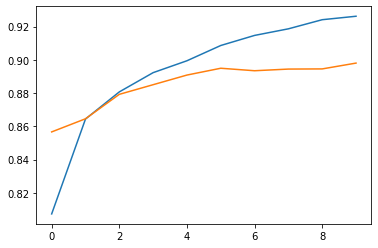

In [10]:
plt.plot(r_fm.history['accuracy'], Label='Accuracy')
plt.plot(r_fm.history['val_accuracy'], Label='Val_Accuracy')
plt.show()

In [0]:
# Building the CNN Fashion Cifar Model
i1 = Input(shape=x_train_cifar[0].shape)
x1 = Conv2D(32 , (3, 3), strides=2, activation='relu')(i1)
x1 = Conv2D(64 , (3, 3), strides=2, activation='relu')(x1)
x1 = Conv2D(128 , (3, 3), strides=2, activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dropout(0.5) (x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.2) (x1)
x1 = Dense(len(set(y_train_cifar)), activation='softmax')(x1)

model_cif = Model(i1, x1)
model_cif.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
r_cif = model_cif.fit(x_train_cifar, y_train_cifar, validation_data=(x_test_cifar, y_test_cifar), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 163us/sample - loss: 1.5818 - accuracy: 0.4232 - val_loss: 1.2788 - val_accuracy: 0.5432
Epoch 2/10
50000/50000 [==============================] - 8s 151us/sample - loss: 1.2931 - accuracy: 0.5330 - val_loss: 1.1589 - val_accuracy: 0.5859
Epoch 3/10
50000/50000 [==============================] - 8s 153us/sample - loss: 1.1640 - accuracy: 0.5813 - val_loss: 1.0487 - val_accuracy: 0.6283
Epoch 4/10
50000/50000 [==============================] - 8s 151us/sample - loss: 1.0630 - accuracy: 0.6220 - val_loss: 0.9868 - val_accuracy: 0.6510
Epoch 5/10
50000/50000 [==============================] - 8s 155us/sample - loss: 0.9953 - accuracy: 0.6467 - val_loss: 0.9887 - val_accuracy: 0.6563
Epoch 6/10
50000/50000 [==============================] - 7s 148us/sample - loss: 0.9296 - accuracy: 0.6713 - val_loss: 0.9004 - val_accuracy: 0.6850
Epoch 7/10
50000/50000 [==========================

In [13]:
# Accuracy
print('Validation Accuracy:',model_cif.evaluate(x_test_cifar, y_test_cifar))

10000/10000 [==============================] - 1s 86us/sample - loss: 0.8479 - accuracy: 0.7036
Validation Accuracy: [0.8478887752532959, 0.7036]


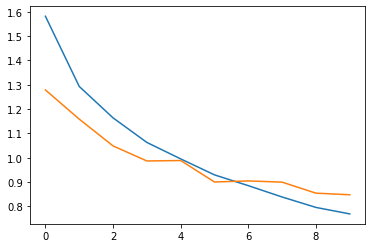

In [14]:
plt.plot(r_cif.history['loss'], Label='Loss')
plt.plot(r_cif.history['val_loss'], Label='Val_Loss')
plt.show()

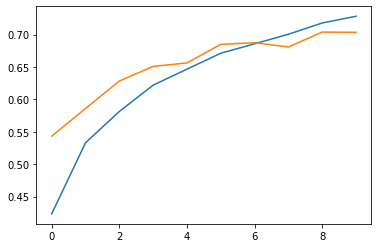

In [15]:
plt.plot(r_cif.history['accuracy'], Label='Accuracy')
plt.plot(r_cif.history['val_accuracy'], Label='Val_Accuracy')
plt.show()

In [0]:
# Improving CNN to increase the accuracy on the Cifar-10
# Generator Creation
batch_size = 32

data_generator = ImageDataGenerator(
    width_shift_range = .1,
    height_shift_range = .1,
    horizontal_flip = True,
    #zoom_range = .1,
    #brightness_range = (.1, .3),
    rotation_range = 15
)

training_generator = data_generator.flow(x_train_cifar, y_train_cifar, batch_size)

In [0]:
# CNN for Cifar- 10 Model 2 with Batch Normalization
i2 = Input(shape=x_train_cifar[0].shape)
x2 = Conv2D(32 , (3, 3), activation='relu', padding='same')(i2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(32 , (3, 3), activation='relu', padding='same')(i2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(2,2)(x2)
#x2 = Dropout(0.2) (x2)
x2 = Conv2D(64 , (3, 3), activation='relu', padding='same')(i2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64 , (3, 3), activation='relu', padding='same')(i2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(2,2)(x2)
#x2 = Dropout(0.2) (x2)
x2 = Conv2D(128 , (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128 , (3, 3), activation='relu', padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(2,2)(x2)
x2 = Flatten()(x2)
#x2 = GlobalMaxPooling2D()(x2)
x2 = Dropout(0.3) (x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.2) (x2)
x2 = Dense(len(set(y_train_cifar)), activation='softmax')(x2)

model_cif_2 = Model(i2, x2)
model_cif_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
r_cif2 = model_cif_2.fit(x_train_cifar, y_train_cifar, validation_data=(x_test_cifar, y_test_cifar), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 289us/sample - loss: 1.5268 - accuracy: 0.5006 - val_loss: 1.4193 - val_accuracy: 0.5310
Epoch 2/50
50000/50000 [==============================] - 13s 265us/sample - loss: 1.0228 - accuracy: 0.6455 - val_loss: 1.3590 - val_accuracy: 0.5731
Epoch 3/50
50000/50000 [==============================] - 13s 265us/sample - loss: 0.8410 - accuracy: 0.7122 - val_loss: 1.1904 - val_accuracy: 0.6364
Epoch 4/50
50000/50000 [==============================] - 13s 266us/sample - loss: 0.7167 - accuracy: 0.7542 - val_loss: 1.5193 - val_accuracy: 0.5867
Epoch 5/50
50000/50000 [==============================] - 13s 266us/sample - loss: 0.6054 - accuracy: 0.7906 - val_loss: 0.8574 - val_accuracy: 0.7167
Epoch 6/50
50000/50000 [==============================] - 13s 266us/sample - loss: 0.5129 - accuracy: 0.8246 - val_loss: 1.0944 - val_accuracy: 0.6711
Epoch 7/50
50000/50000 [====================

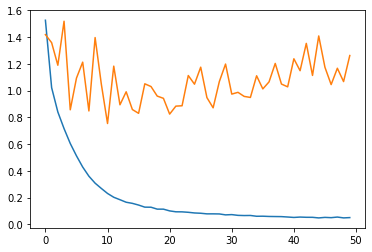

In [19]:
# Plotting Second Model Loss
plt.plot(r_cif2.history['loss'], Label='Loss')
plt.plot(r_cif2.history['val_loss'], Label='Val_Loss')
plt.show()

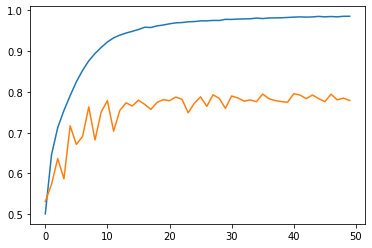

In [20]:
# Plotting Second Model Accuracy
plt.plot(r_cif2.history['accuracy'], Label='Accuracy')
plt.plot(r_cif2.history['val_accuracy'], Label='Val_Accuracy')
plt.show()

In [21]:
# Training Second Model
r_cif2_gen = model_cif_2.fit_generator(training_generator, steps_per_epoch=(x_train_cifar.shape[0]/batch_size), validation_data=(x_test_cifar, y_test_cifar),epochs = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562.5 steps, validate on 10000 samples
Epoch 1/50
1563/1562 [==============================] - 29s 19ms/step - loss: 0.8347 - accuracy: 0.7264 - val_loss: 0.7589 - val_accuracy: 0.7606
Epoch 2/50
1563/1562 [==============================] - 30s 19ms/step - loss: 0.6817 - accuracy: 0.7733 - val_loss: 0.6353 - val_accuracy: 0.7977
Epoch 3/50
1563/1562 [==============================] - 29s 19ms/step - loss: 0.6452 - accuracy: 0.7844 - val_loss: 0.6887 - val_accuracy: 0.7841
Epoch 4/50
1563/1562 [==============================] - 29s 19ms/step - loss: 0.6033 - accuracy: 0.7969 - val_loss: 0.6087 - val_accuracy: 0.7973
Epoch 5/50
1563/1562 [==============================] - 29s 19ms/step - loss: 0.5823 - accuracy: 0.8045 - val_loss: 0.5488 - val_accuracy: 0.8165
Epoch 6/50
1563/1562 [==============================] - 29s 19ms/step - loss: 0.5624 - accuracy: 0.8107 - val_loss: 0.5

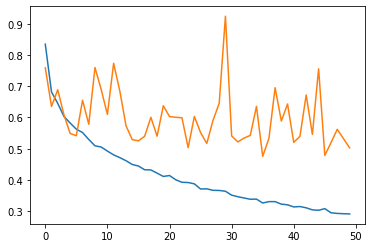

In [22]:
# Plotting Second Model Loss
plt.plot(r_cif2_gen.history['loss'], Label='Loss')
plt.plot(r_cif2_gen.history['val_loss'], Label='Val_Loss')
plt.show()

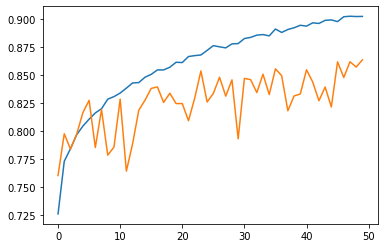

In [23]:
# Plotting Second Model Accuracy
plt.plot(r_cif2_gen.history['accuracy'], Label='Accuracy')
plt.plot(r_cif2_gen.history['val_accuracy'], Label='Val_Accuracy')
plt.show()